In [ ]:
from google.colab import drive
drive.mount('/drive') 

Mounted at /drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [ ]:
def removeHair(img):
    grayScale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel = cv2.getStructuringElement(1,(17,17)) #kernelsize=17x17
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)     
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    
    hairRemoved = cv2.inpaint(img,threshold,1,cv2.INPAINT_TELEA) #inpaint with original image and threshold image
    return hairRemoved

In [ ]:
np.sort(os.listdir('/drive/My Drive/CAD_1_1/train/les/'))

array(['ls0001.jpg', 'ls0002.jpg', 'ls0003.jpg', ..., 'ls2398.jpg',
       'ls2399.jpg', 'ls2400.jpg'], dtype='<U10')

In [ ]:
trainX_Les = []
for filepath in tqdm(np.sort(os.listdir('/drive/My Drive/CAD_1_1/train/les/'))):
    trainX_Les.append(removeHair(cv2.cvtColor(cv2.imread('/drive/My Drive/CAD_1_1/train/les/{0}'.format(filepath),1),cv2.COLOR_BGR2RGB)))

 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

/drive/My Drive/CAD_1_1/train/les/ls0001.jpg


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

/drive/My Drive/CAD_1_1/train/les/ls0002.jpg


 30%|███       | 3/10 [00:02<00:05,  1.28it/s]

/drive/My Drive/CAD_1_1/train/les/ls0003.jpg


 40%|████      | 4/10 [00:02<00:03,  1.70it/s]

/drive/My Drive/CAD_1_1/train/les/ls0004.jpg


 50%|█████     | 5/10 [00:02<00:02,  1.97it/s]

/drive/My Drive/CAD_1_1/train/les/ls0005.jpg


 60%|██████    | 6/10 [00:03<00:01,  2.31it/s]

/drive/My Drive/CAD_1_1/train/les/ls0006.jpg


 70%|███████   | 7/10 [00:03<00:01,  2.59it/s]

/drive/My Drive/CAD_1_1/train/les/ls0007.jpg


 80%|████████  | 8/10 [00:03<00:00,  2.55it/s]

/drive/My Drive/CAD_1_1/train/les/ls0008.jpg


 90%|█████████ | 9/10 [00:04<00:00,  1.83it/s]

/drive/My Drive/CAD_1_1/train/les/ls0009.jpg


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]

/drive/My Drive/CAD_1_1/train/les/ls0010.jpg


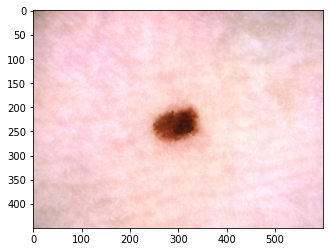

In [ ]:
 plt.imshow(trainX_Les[9])

In [ ]:
trainX_NV = []
for filepath in tqdm(np.sort(os.listdir('/drive/My Drive/CAD_1_1/train/nv/'))):
    trainX_NV.append(removeHair(cv2.cvtColor(cv2.imread('/drive/My Drive/CAD_1_1/train/nv/{0}'.format(filepath),1),cv2.COLOR_BGR2RGB)))

100%|██████████| 2400/2400 [34:06<00:00,  1.17it/s]


In [ ]:
valX_Les = []
for filepath in tqdm(np.sort(os.listdir('/drive/My Drive/CAD_1_1/val/les/'))):
    valX_Les.append(removeHair(cv2.cvtColor(cv2.imread('/drive/My Drive/CAD_1_1/val/les/{0}'.format(filepath),1),cv2.COLOR_BGR2RGB)))

100%|██████████| 600/600 [09:12<00:00,  1.09it/s]


In [ ]:
valX_NV = []
for filepath in tqdm(np.sort(os.listdir('/drive/My Drive/CAD_1_1/val/nv/'))):
    valX_NV.append(removeHair(cv2.cvtColor(cv2.imread('/drive/My Drive/CAD_1_1/val/nv/{0}'.format(filepath),1),cv2.COLOR_BGR2RGB)))

100%|██████████| 600/600 [09:08<00:00,  1.09it/s]


In [ ]:
print(np.array(trainX_Les).shape)
print(np.array(trainX_NV).shape)
print(np.array(valX_Les).shape)
print(np.array(valX_NV).shape)

(2400, 450, 600, 3)
(2400, 450, 600, 3)
(600, 450, 600, 3)
(600, 450, 600, 3)


In [ ]:
test = []
for filepath in tqdm(np.sort(os.listdir('/drive/My Drive/CAD_1_1/test/'))):
    test.append(removeHair(cv2.cvtColor(cv2.imread('/drive/My Drive/CAD_1_1/test/{0}'.format(filepath),1),cv2.COLOR_BGR2RGB)))


100%|██████████| 1015/1015 [10:58<00:00,  1.54it/s]


In [ ]:
print(np.array(test).shape)

(1015, 450, 600, 3)


In [ ]:
np.savez_compressed('/drive/My Drive/CAD_1_1/train_Les_hairRemoved.npz' , trainX_Les= np.array(trainX_Les))

In [ ]:
np.savez_compressed('/drive/My Drive/CAD_1_1/train_NV_hairRemoved.npz'  , trainX_NV np.array(trainX_NV))

In [ ]:
np.savez_compressed('/drive/My Drive/CAD_1_1/val_Les_hairRemoved.npz'   , valX_Les = np.array(valX_Les))

In [ ]:
np.savez_compressed('/drive/My Drive/CAD_1_1/val_NV_hairRemoved.npz'    ,  valX_NV = np.array(valX_NV))

In [ ]:
np.savez_compressed('/drive/My Drive/CAD_1_1/test_hairRemoved.npz' , test= np.array(test))